In [39]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [40]:
kernel = 1/9 * np.ones((3,3))
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

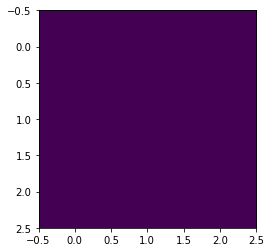

In [41]:
plt.imshow(kernel)

In [9]:
def convolve(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Convolve an image with a kernel assuming zero-padding of the image to handle the borders

    :param image: the image (either greyscale shape=(rows, cols) or colour shape=(rows, cols, channels))
    :type numpy.ndarray

    :param: kernel: the kernel (shape=(kheight, kwidth); both dimensions odd)
    :type: numpy.ndarray

    :returns the convolved image (of the same shape as the input image)
    :rtype numpy.ndarray
    """
    im_count_row, im_count_col = image.shape
    kern_count_row, kern_count_col = kernel.shape
    if (kern_count_row % 2) == 0:
        raise ValueError('Kernel cannot be an even dimension!')
    if (kern_count_col % 2) == 0:
        raise ValueError('Kernel cannot be an even dimension!')
    out = np.zeros_like(image)
    # width of padding is half the size of kernel
    pad_count_row = np.floor((kern_count_row/2)).astype(int)
    pad_count_col = np.floor((kern_count_col/2)).astype(int)
    image_padded = np.pad(image, (pad_count_row, pad_count_col), mode='constant')
    for x in range(im_count_col):
        for y in range(im_count_row):
            # guard against going past padding
            if x >= (im_count_col - kern_count_col):
                continue
            if y >= (im_count_row - kern_count_row):
                continue
            # convolve
            image_section = image_padded[x: x+kern_count_col, y: y+kern_count_row]
            out[x,y] = (kernel * image_section).sum()
    return out

(265, 225)


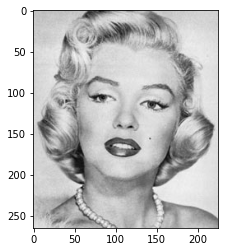

In [47]:
im = Image.open('data/marilyn.bmp').convert('L')
image = np.array(im)
print(image.shape)
plt.imshow(image, cmap=plt.cm.gray)

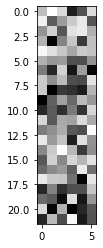

In [35]:
image = np.random.randint(low=0, high=255, size=(22,6))
plt.imshow(image,cmap=plt.cm.gray)

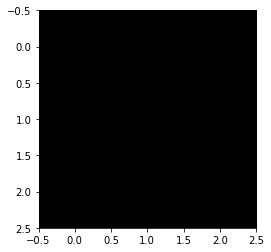

In [36]:
kernel = (1/9) * np.ones((3,3))
plt.imshow(kernel, cmap=plt.cm.gray)

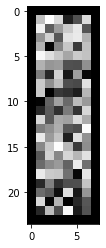

In [37]:
kern_count_row, kern_count_col = kernel.shape
pad_count_row = np.floor((kern_count_row/2)).astype(int)
pad_count_col = np.floor((kern_count_col/2)).astype(int)
image_padded = np.pad(image, (pad_count_row, pad_count_col), mode='constant')
plt.imshow(image_padded, cmap=plt.cm.gray)

In [63]:
def convolve(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # convolution output
    output = np.zeros_like(image)
    print(image.shape)
    print(image)
    im_count_row, im_count_col = image.shape
    kern_count_row, kern_count_col = kernel.shape

    pad_count_row = np.floor((kern_count_row/2)).astype(int)
    pad_count_col = np.floor((kern_count_col/2)).astype(int)

    # Add zero padding to the input image
    image_padded = np.pad(image, (pad_count_row, pad_count_col), mode='constant')
    print(image_padded.shape)
    print(image_padded)
    print(pad_count_row)
    print(pad_count_col)
    
    # print(f"{padded[y_start:y_end,x_start:x_end]}")

    image_padded[pad_count_row:-pad_count_col, pad_count_col:-pad_count_row] = image
    print(image_padded)

    # Loop over every pixel of the image
    print('image.shape:', image.shape)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            output[x,y]=(kernel * image_padded[x: x+kern_count_col, y: y+kern_count_row]).sum()

    return output

(265, 225)


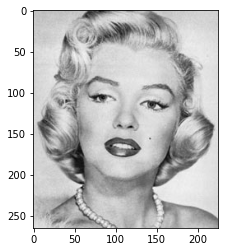

In [65]:
im = Image.open('data/marilyn.bmp').convert('L')
image = np.array(im)
print(image.shape)
plt.imshow(image, cmap=plt.cm.gray)

(265, 225)
[[196 187 185 ... 201 203 200]
 [188 185 185 ... 199 201 196]
 [184 187 187 ... 203 204 202]
 ...
 [210 213 212 ... 164 161 157]
 [214 215 211 ... 160 156 155]
 [211 212 210 ... 158 160 158]]
(267, 227)
[[  0   0   0 ...   0   0   0]
 [  0 196 187 ... 203 200   0]
 [  0 188 185 ... 201 196   0]
 ...
 [  0 214 215 ... 156 155   0]
 [  0 211 212 ... 160 158   0]
 [  0   0   0 ...   0   0   0]]
1
1
[[  0   0   0 ...   0   0   0]
 [  0 196 187 ... 203 200   0]
 [  0 188 185 ... 201 196   0]
 ...
 [  0 214 215 ... 156 155   0]
 [  0 211 212 ... 160 158   0]
 [  0   0   0 ...   0   0   0]]
image.shape: (265, 225)


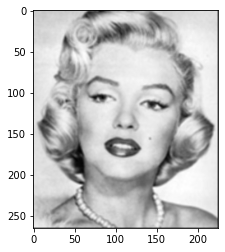

In [66]:
kernel = (1/9) * np.ones((3,3))
conv_img = convolve(image, kernel)
plt.imshow(conv_img, cmap=plt.cm.gray)